# Load the dataset

In [74]:
# Load and Initialize the necessary libraries

# Basic dataset visualization libraries
from tabulate import tabulate

# Basic math libraries
import numpy as np
import pandas as pd
import re
from collections import Counter

# Basic plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

# Basic data-science libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

# Basic methods for model implement
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Connect to drive for dataset access
from google.colab import drive
drive.mount('/content/drive')

# To ignore any warning
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# Define the new column names for easier access of columns
column_names=['temperature', 'luminosity', 'radius', 'absolute_magnitude', 'color', 'spectral_class', 'star_type']

# Import the star dataset
df = pd.read_csv(
        filepath_or_buffer='/content/drive/My Drive/datasets/stars_data.csv',
        sep=',',
        header='infer',
        names=column_names,
        skiprows=1)

print(tabulate(df.sample(frac=1, random_state=42).reset_index(drop=True).head(), headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════════╤══════════════╤══════════╤══════════════════════╤════════════╤══════════════════╤═════════════╕
│    │   temperature │   luminosity │   radius │   absolute_magnitude │ color      │ spectral_class   │   star_type │
╞════╪═══════════════╪══════════════╪══════════╪══════════════════════╪════════════╪══════════════════╪═════════════╡
│  0 │         16500 │      0.013   │    0.014 │                11.89 │ Blue White │ B                │           2 │
├────┼───────────────┼──────────────┼──────────┼──────────────────────┼────────────┼──────────────────┼─────────────┤
│  1 │          2637 │      0.00073 │    0.127 │                17.22 │ Red        │ M                │           0 │
├────┼───────────────┼──────────────┼──────────┼──────────────────────┼────────────┼──────────────────┼─────────────┤
│  2 │          4980 │      0.357   │    1.13  │                 4.78 │ Yellowish  │ K                │           3 │
├────┼───────────────┼──────────────┼──────────┼────────

# Data Description

In [76]:
# To get the size of the data
print('There are %d datapoints and %d features for the data' % df.shape)

There are 240 datapoints and 7 features for the data


In [77]:
# To get type summary of the columns in df
print('Type Information values')
df.info()

Type Information values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         240 non-null    int64  
 1   luminosity          240 non-null    float64
 2   radius              240 non-null    float64
 3   absolute_magnitude  240 non-null    float64
 4   color               240 non-null    object 
 5   spectral_class      240 non-null    object 
 6   star_type           240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [78]:
# To get statistical summary of the numerical columns in df
print('Standard statistical values')
df.describe()

Standard statistical values


,temperature,luminosity,radius,absolute_magnitude,star_type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [79]:
# To get the total count of nan values in each column
print('Count of nan values')
df.isna().sum()

Count of nan values


temperature           0
luminosity            0
radius                0
absolute_magnitude    0
color                 0
spectral_class        0
star_type             0
dtype: int64

In [80]:
# To get the total count of duplicate rows
print('Count of duplicate rows')
df.duplicated().sum()

Count of duplicate rows


0

In [81]:
# To get the insights of the skewness of dataset
df.drop(['color', 'spectral_class'], axis=1).skew()

temperature           1.321568
luminosity            2.068069
radius                1.946800
absolute_magnitude   -0.121540
star_type             0.000000
dtype: float64

In [82]:
# To get the correlation matrix of the numeric columns
df.drop(['color', 'spectral_class'], axis=1).corr()

,temperature,luminosity,radius,absolute_magnitude,star_type
temperature,1.000000,0.393404,0.064216,-0.420261,0.411129
luminosity,0.393404,1.000000,0.526516,-0.692619,0.676845
radius,0.064216,0.526516,1.000000,-0.608728,0.660975
absolute_magnitude,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
star_type,0.411129,0.676845,0.660975,-0.955276,1.000000


In [83]:
# To check the number of categories in categorical columns
df[['color', 'spectral_class', 'star_type']].nunique()

color             17
spectral_class     7
star_type          6
dtype: int64

In [84]:
# To get the different color names and its respective counts
df['color'].value_counts()

color
Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: count, dtype: int64

In [85]:
# To get the different star types and its respective counts
df['star_type'].value_counts()

star_type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

In [86]:
# To get the different spectral classes and its respective counts
df['spectral_class'].value_counts()

spectral_class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64

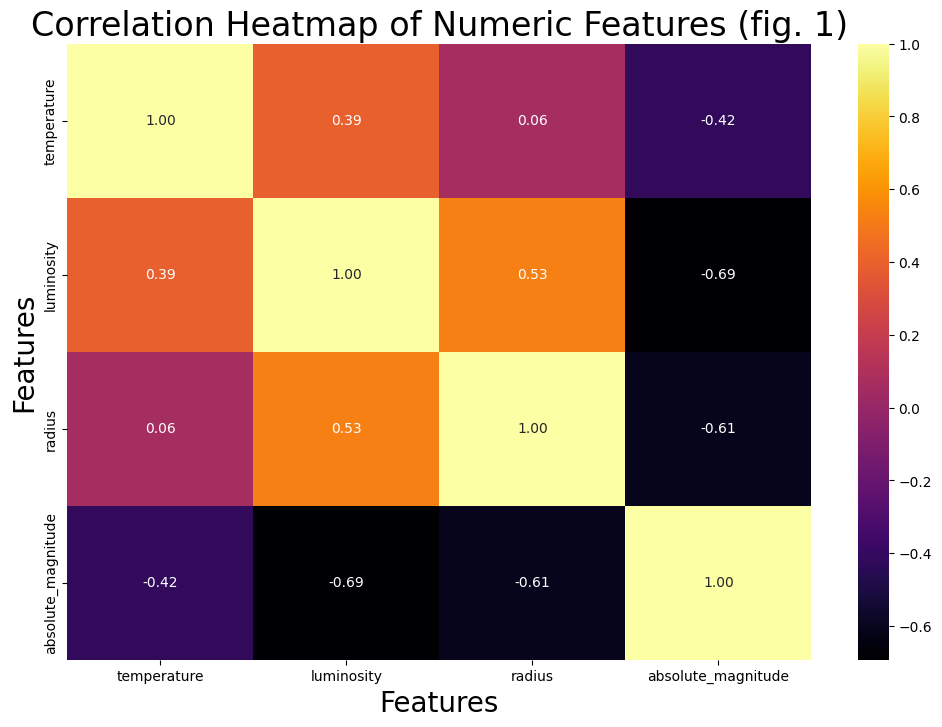

In [87]:
# Set the figure size
plt.figure(figsize=(12, 8))

# To get the correlations between columns
ax = sns.heatmap(df.drop(['color', 'spectral_class', 'star_type'], axis=1).corr(), annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features (fig. 1)', fontsize=24)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.grid(False)
plt.show()


Bivarite Analysis for features (fig. 2)



<Figure size 1200x800 with 0 Axes>

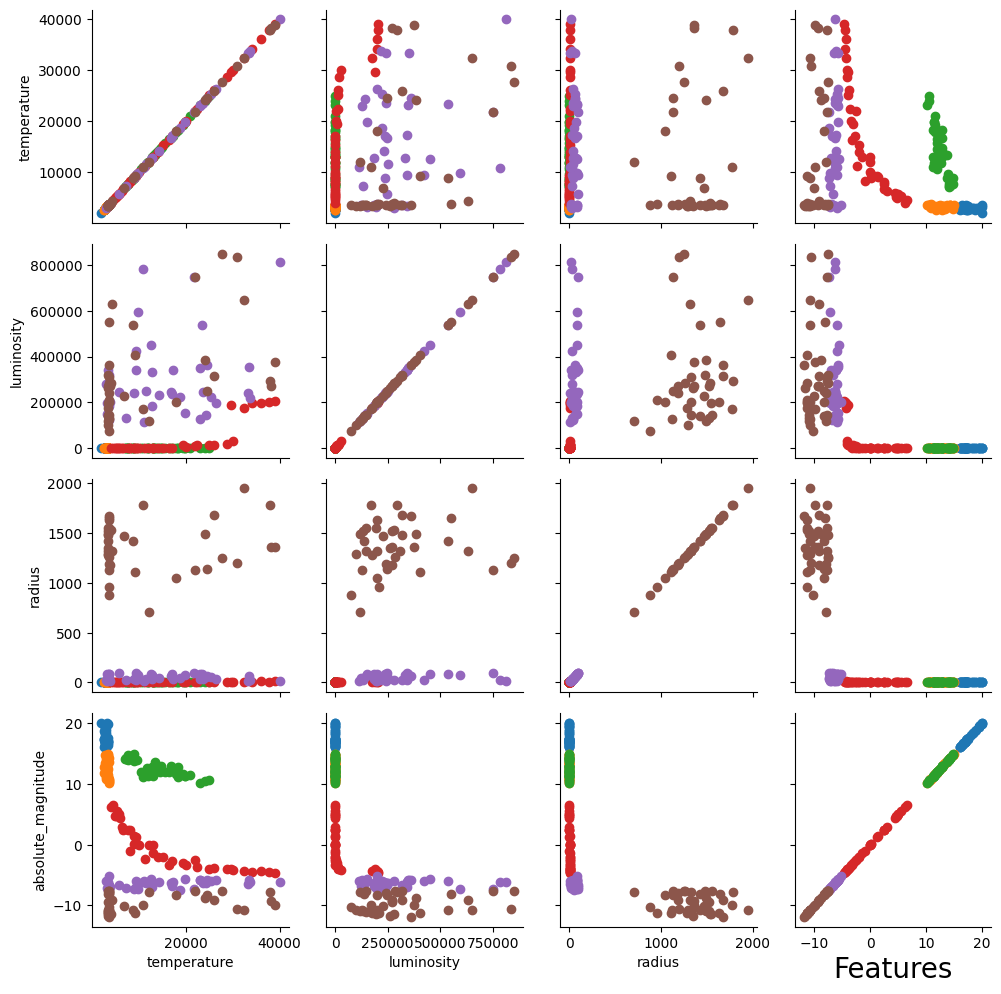

In [88]:
# Set the figure size
plt.figure(figsize=(12, 8))

# To get the bivarite analysis of the dataframe
print('\nBivarite Analysis for features (fig. 2)\n')
ax = sns.PairGrid(data=df, hue='star_type')
ax.map(plt.scatter)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.grid(False)
plt.show()

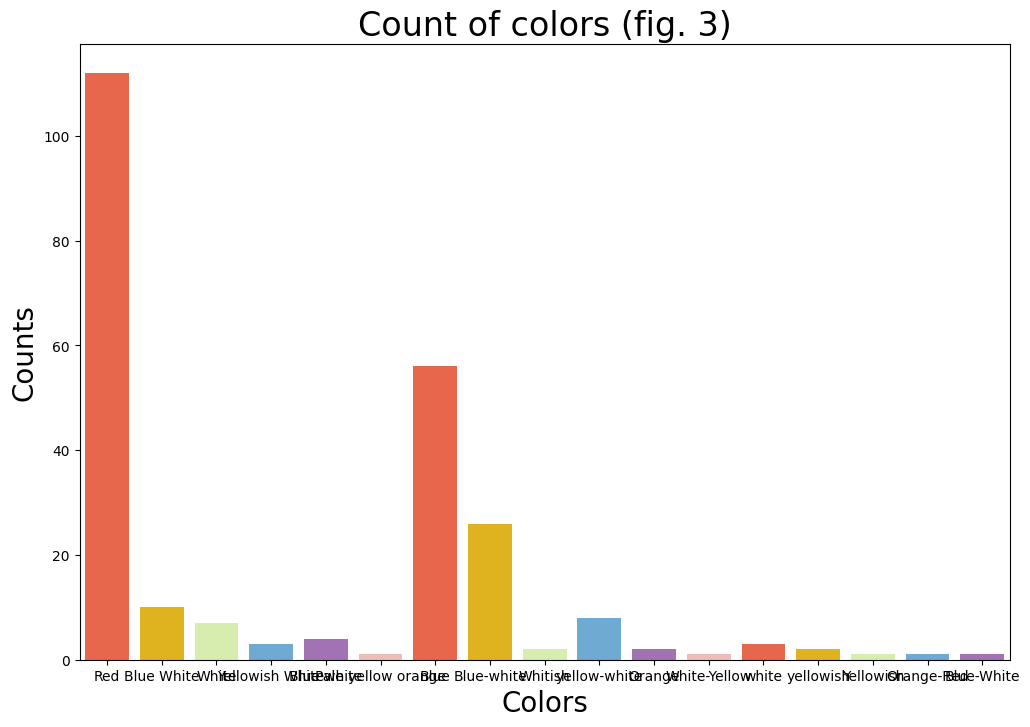

In [89]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Initialize the color palletes
custom_colors = ['#FF5733', '#FFC300', '#DAF7A6', '#5DADE2', '#A569BD', '#F5B7B1']

# To visualize the count of colors
ax = sns.countplot(x='color', data = df, palette=custom_colors)
plt.title('Count of colors (fig. 3)', fontsize=24)
plt.xlabel('Colors', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.grid(False)
plt.show()

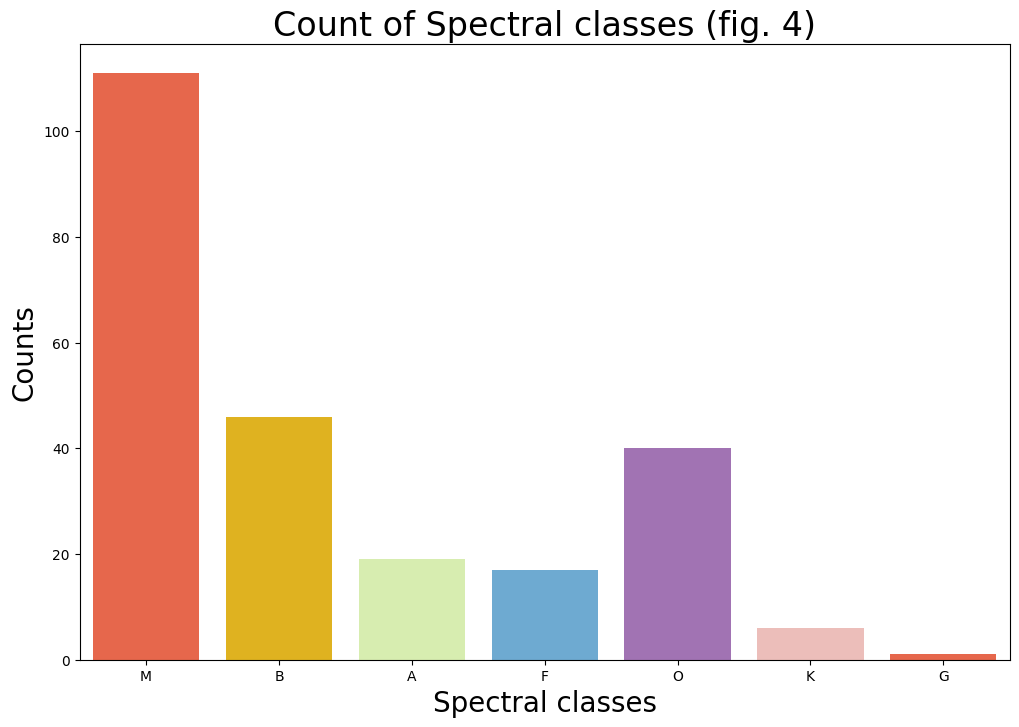

In [90]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Initialize the color palletes
custom_colors = ['#FF5733', '#FFC300', '#DAF7A6', '#5DADE2', '#A569BD', '#F5B7B1']

# To visualize the count of spectral classes
ax = sns.countplot(x='spectral_class', data = df, palette=custom_colors)
plt.title('Count of Spectral classes (fig. 4)', fontsize=24)
plt.xlabel('Spectral classes', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.grid(False)
plt.show()

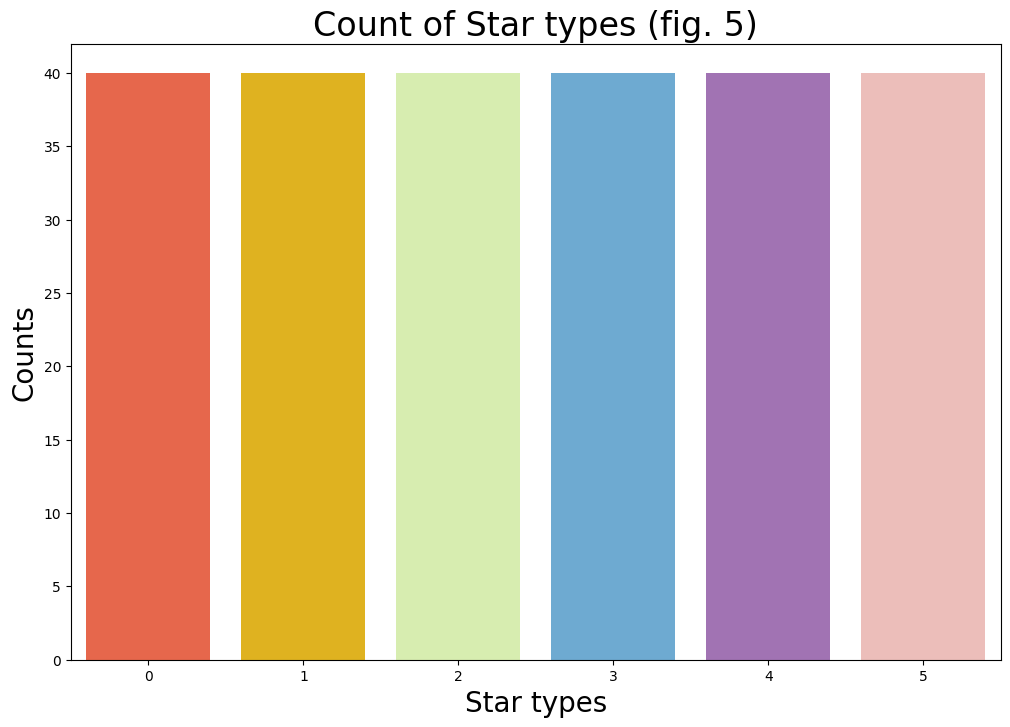

In [91]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Initialize the color palletes
custom_colors = ['#FF5733', '#FFC300', '#DAF7A6', '#5DADE2', '#A569BD', '#F5B7B1']

# To visualize the count of star types
ax = sns.countplot(x='star_type', data = df, palette=custom_colors)
plt.title('Count of Star types (fig. 5)', fontsize=24)
plt.xlabel('Star types', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.grid(False)
plt.show()

In [92]:
# Set the figure size
plt.figure(figsize=(12, 8))

# To get the average temperature by color
ax = px.histogram(df, 'temperature', color='color', title='Average Temparature by color (fig. 6)')
ax.show()

<Figure size 1200x800 with 0 Axes>

In [93]:
# Set the figure size
plt.figure(figsize=(12, 8))

# To get average relative luminosity by color
ax = px.histogram(df, 'luminosity', color='color', title='Average Relative Luminocity by color (fig. 7)')
ax.show()

<Figure size 1200x800 with 0 Axes>

In [94]:
# Set the figure size
plt.figure(figsize=(12, 8))

# To get average relative radius by color
ax = px.histogram(df, 'radius', color='color', title='Average Relative Radius by color (fig. 8)')
ax.show()

<Figure size 1200x800 with 0 Axes>

In [95]:
# Set the figure size
plt.figure(figsize=(12, 8))

# To get average absolute magnitude by color
ax = px.histogram(df, 'absolute_magnitude', color='color', title='Average Absolute Magnitude by color (fig. 9)')
ax.show()

<Figure size 1200x800 with 0 Axes>

In [96]:
# Set the figure size
plt.figure(figsize=(12, 8))

# To get the average temperature by spectral class
ax = px.histogram(df, 'temperature', color='spectral_class', title='Average Temparature by Spectral_Class (fig. 10)')
ax.show()

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

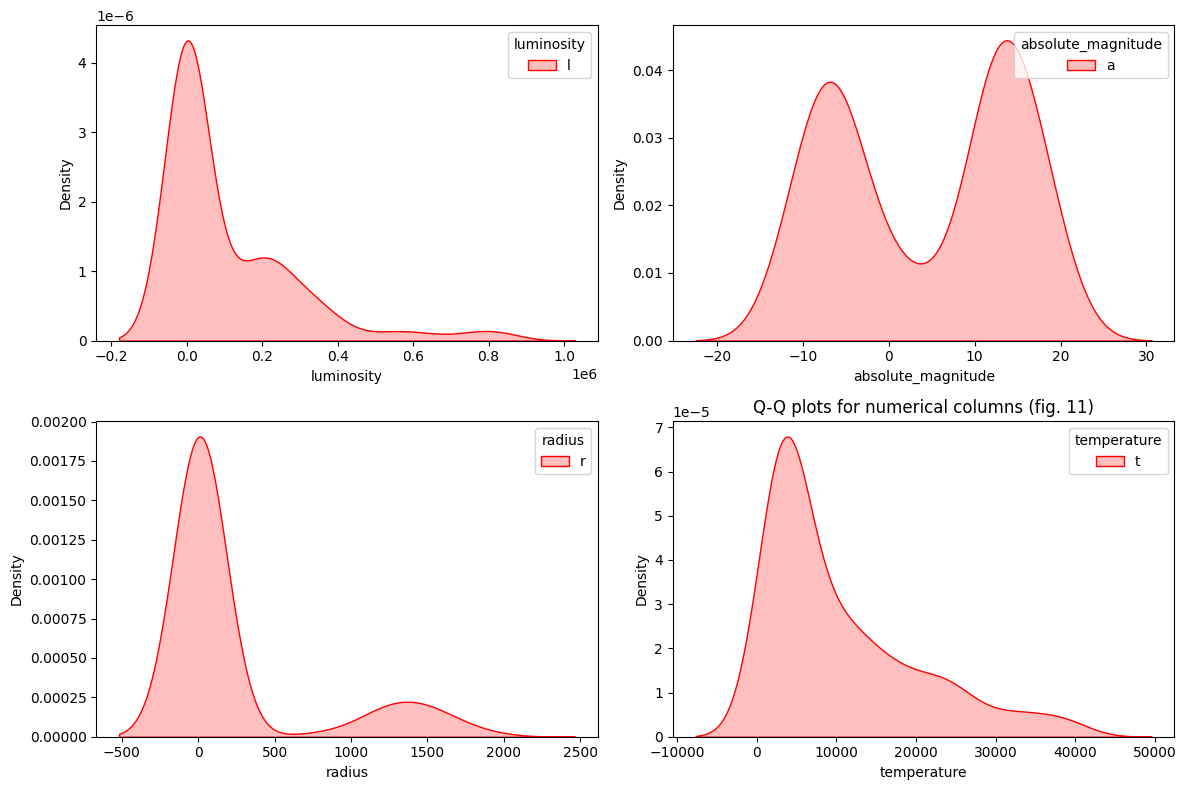

In [97]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Observe the Density plots for all features
cat_cols = set(df.drop(['star_type', 'spectral_class', 'color'], axis=1).columns)
num_cols = 2
num_rows = (len(cat_cols) + 1) // 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
if len(cat_cols) > 1:
    axes = axes.flatten()
for i, col in enumerate(cat_cols):
    ax = axes[i]
    ax = sns.kdeplot(data=df[col], ax=ax, color='red', shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax = ax.legend(col)
    ax.set_title(col)

for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.title('Q-Q plots for numerical columns (fig. 11)')
plt.tight_layout()
plt.show()

# Observations




1. We have 240 datapoints with 7 features.

2. Observations from figures plotted above
    1. Star type and absolute magnitude exhibit a strong negative correlation, while luminosity and radius show a significant positive correlation. However, there is no correlation between radius and temperature.

    2. No unique relationships exist among all features, but certain pairs can distinctly cluster different star types, such as absolute magnitude and temperature.

    3. Red color is predominant, followed by blue, with yellowish and orange as the least common colors.

    4. The spectral class 'M' is the most frequent, followed by 'B' and 'O', while 'G' and 'K' are the least represented classes.

    5. We have an equal number of samples from each of the six classes, ensuring balanced representation across all categories.
    
    6. Red, yellow, and orange stars have temperature less than 5k, except for one red star. Blue stars have the highest temperature. Most white, yellow-white, pale yellow orange, and orange-red stars have temperature between 5k to 10k. Most blue-white stars have temperature between 10k to 15k.

    7. Red and blue stars are the most luminous, with blue stars having a luminosity of >125k and < 400k. Most other stars have a luminosity of about 25k.

    8. Approximately 83% of the 240 stars have a radius of 100, while blue stars have the highest radius.

    9. Most of colored stars have the highest Absolute Magnitude (mostly)

    10. Most spectral class 'M' stars have average temperatures below 5K, while spectral class 'O' stars show a wider range, spanning from 5K to 55K, indicating greater temperature diversity within class 'O' compared to class 'M'.

3. from the last figure 11 we observe that none of the features follows normal diatribution. They follows power law or are mixture of gaussians  

# Preprocessing

In [98]:
# Perform some operations on dataset to get it ready to implement model
def preprocess_stars(df):

    # we observe that few categories of color are basically the same
    # so for convenience they can be made- into single categories
    df['color'] = df.loc[:, 'color'].str.replace('Whitish|white', 'White', regex=True)
    df['color'] = df.loc[:, 'color'].str.replace('blu.+whit.+', 'blue-white', flags=re.IGNORECASE, regex=True)
    df['color'] = df.loc[:, 'color'].str.replace('(yell.+whit.+)|(whit.+yell.+)', 'yellow-white', flags=re.IGNORECASE, regex=True)
    df['color'] = df.loc[:, 'color'].str.replace('yellowish', 'Yellow', regex=True, flags=re.IGNORECASE)

    # convert the categorical values to numerical
    color_encoder = preprocessing.LabelEncoder()
    df['color'] = color_encoder.fit_transform(df['color'])

    spectral_class_encoder = preprocessing.LabelEncoder()
    df['spectral_class'] = spectral_class_encoder.fit_transform(df['spectral_class'])

    return df

preprocessing_pipeline = Pipeline([
    ('cleaning', preprocessing.FunctionTransformer(preprocess_stars, validate=False)),
], verbose=True)

new_df = preprocessing_pipeline.fit_transform(df)

[Pipeline] .......... (step 1 of 1) Processing cleaning, total=   0.0s


In [99]:
# Split the Data in Training and Testing sets
features = new_df.drop(['star_type'], axis=1)
labels = new_df['star_type']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [100]:
# Feature scaling is performed on the training features
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Implementation

<h2>KNN</h2>

In [121]:
# Implement the KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('The accuracy score: ', round(accuracy_score(y_test, y_pred), 2))

The accuracy score:  0.92


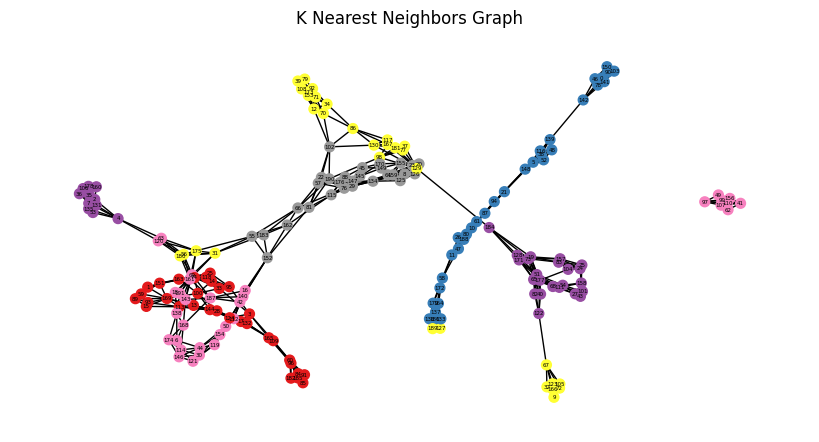

In [127]:
# To set the figure size
plt.figure(figsize=(8, 4))

# Generate the graph and plot the knn neighbors graph
graph = knn.kneighbors_graph()
G = nx.Graph(graph)
nx.draw(G, with_labels=True, node_color=y_train, cmap=plt.cm.Set1, node_size=50, font_size=4)
plt.title("K Nearest Neighbors Graph")
plt.show()

Text(0.5, 58.7222222222222, 'Predicted class')

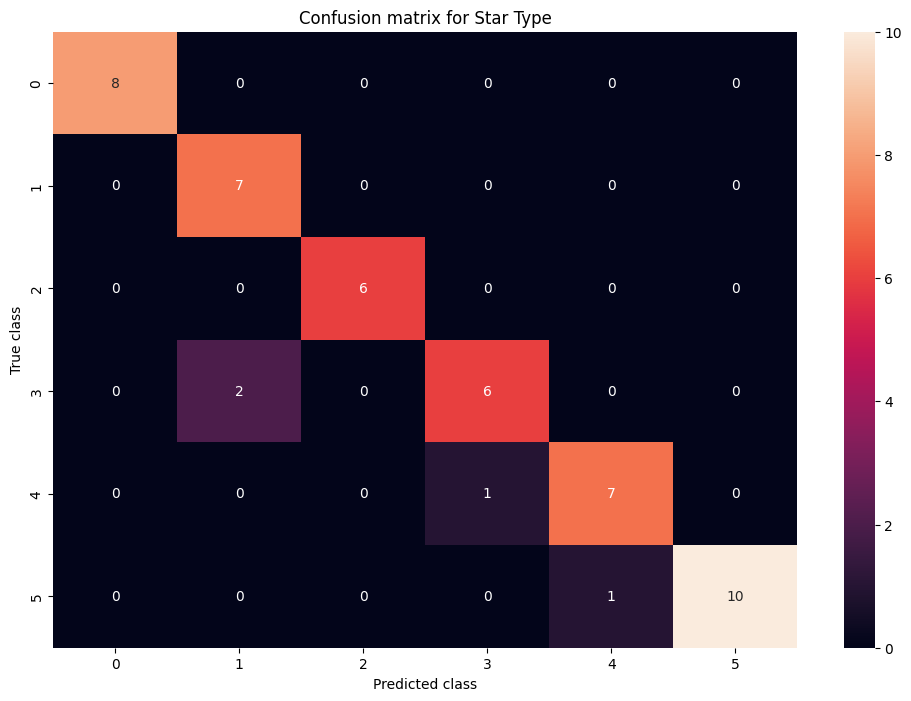

In [123]:
# Set the figure size
plt.figure(figsize=(12, 8))

# To get the confusion matrix and plot it
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title('Confusion matrix for Star Type')
plt.ylabel('True class')
plt.xlabel('Predicted class')

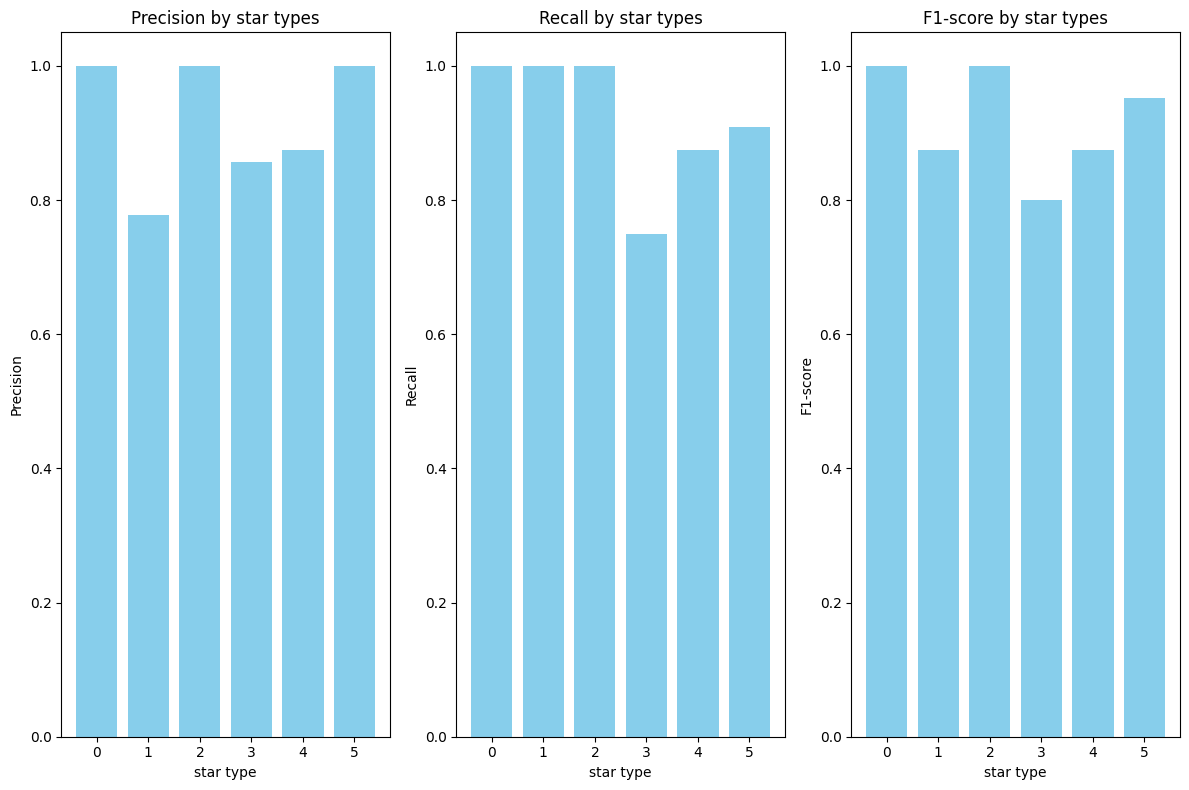

In [103]:
# To set the figure size
plt.figure(figsize=(12, 8))

# Plot score the classification scores
report = classification_report(y_test, y_pred, output_dict=True)

classes = list(report.keys())[:-3]
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {cls: {metric: report[cls][metric] for metric in metrics} for cls in classes}

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    plt.bar(classes, [class_metrics[cls][metric] for cls in classes], color='skyblue')
    plt.title(f'{metric.capitalize()} by star types')
    plt.xlabel('star type')
    plt.ylabel(metric.capitalize())

plt.tight_layout()
plt.show()


<h2>KDTree</h2>

In [128]:
# Split new datset into features and labels
# we have taken the most important 3 features
features = new_df[['absolute_magnitude', 'luminosity', 'radius']].values
labels = new_df['star_type'].values

# Split new_df into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42)

# Create a KD-Tree with the training new_df
tree = KDTree(train_features, leaf_size=40)

# Find the two nearest neighbors for each test new_df point
nearest_indices = []
for point in test_features:
    _, ind = tree.query([point], k=1)
    nearest_indices.append(ind[0])

# Classify test points based on the most common class among the neighbors
predicted_classes = []
for indices in nearest_indices:
    neighbor_classes = train_labels[indices]
    most_common = Counter(neighbor_classes).most_common(1)
    predicted_classes.append(most_common[0][0])

print('The accuracy score: ', round(accuracy_score(test_labels, predicted_classes), 2))

The accuracy score:  0.85


Text(0.5, 0.92, 'Test Points and Their Nearest Neighbors')

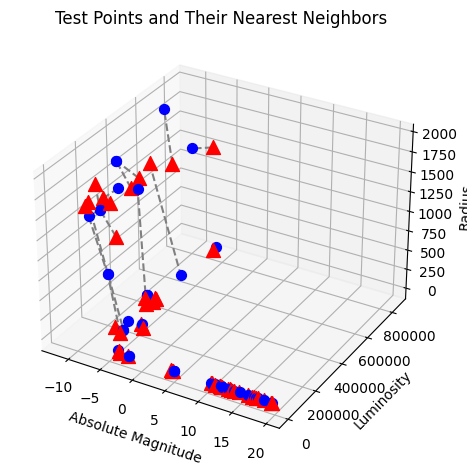

In [131]:
# Visualization
fig = plt.figure(figsize=(12, 10))

# Subplot for the 3D scatter plot
ax = fig.add_subplot(121, projection='3d')
for i, point in enumerate(test_features):
    # Plot test points
    ax.scatter(point[0], point[1], point[2], color='red', marker='^', s=100)
    # Plot two nearest neighbors
    for idx in nearest_indices[i]:
        neighbor_point = train_features[idx]
        ax.scatter(neighbor_point[0], neighbor_point[1], neighbor_point[2], color='blue', marker='o', s=50)
        ax.plot([point[0], neighbor_point[0]], [point[1], neighbor_point[1]], [point[2], neighbor_point[2]], 'gray', linestyle='--')

ax.set_xlabel('Absolute Magnitude')
ax.set_ylabel('Luminosity')
ax.set_zlabel('Radius')
ax.set_title('Test Points and Their Nearest Neighbors')

Text(0.5, 58.7222222222222, 'Predicted class')

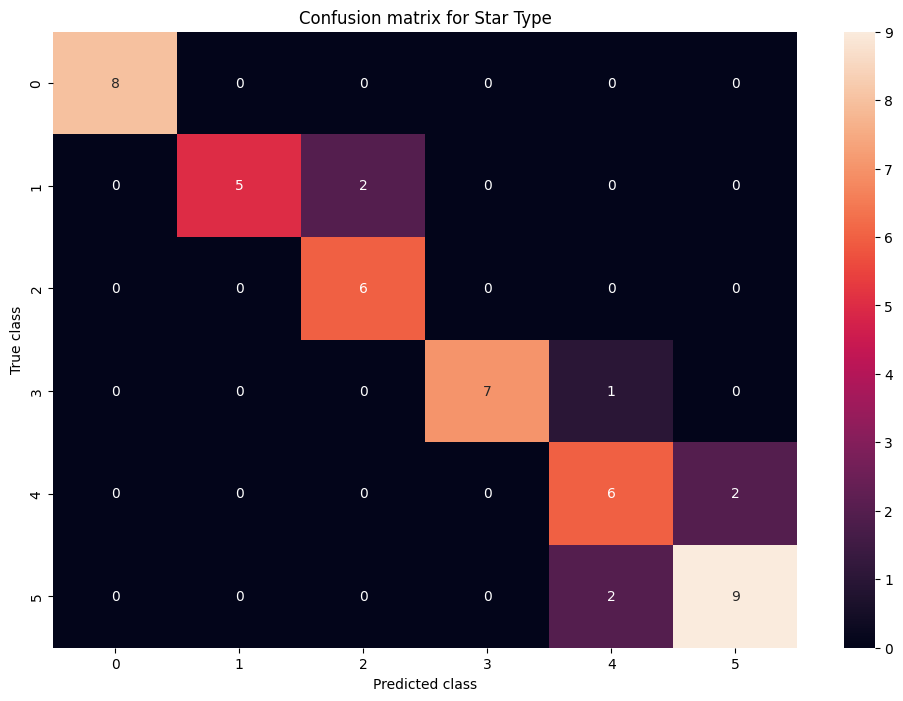

In [130]:
# Set the figure size
plt.figure(figsize=(12, 8))

# To get the confusion matrix and plot it
conf_matrix = confusion_matrix(test_labels, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title('Confusion matrix for Star Type')
plt.ylabel('True class')
plt.xlabel('Predicted class')

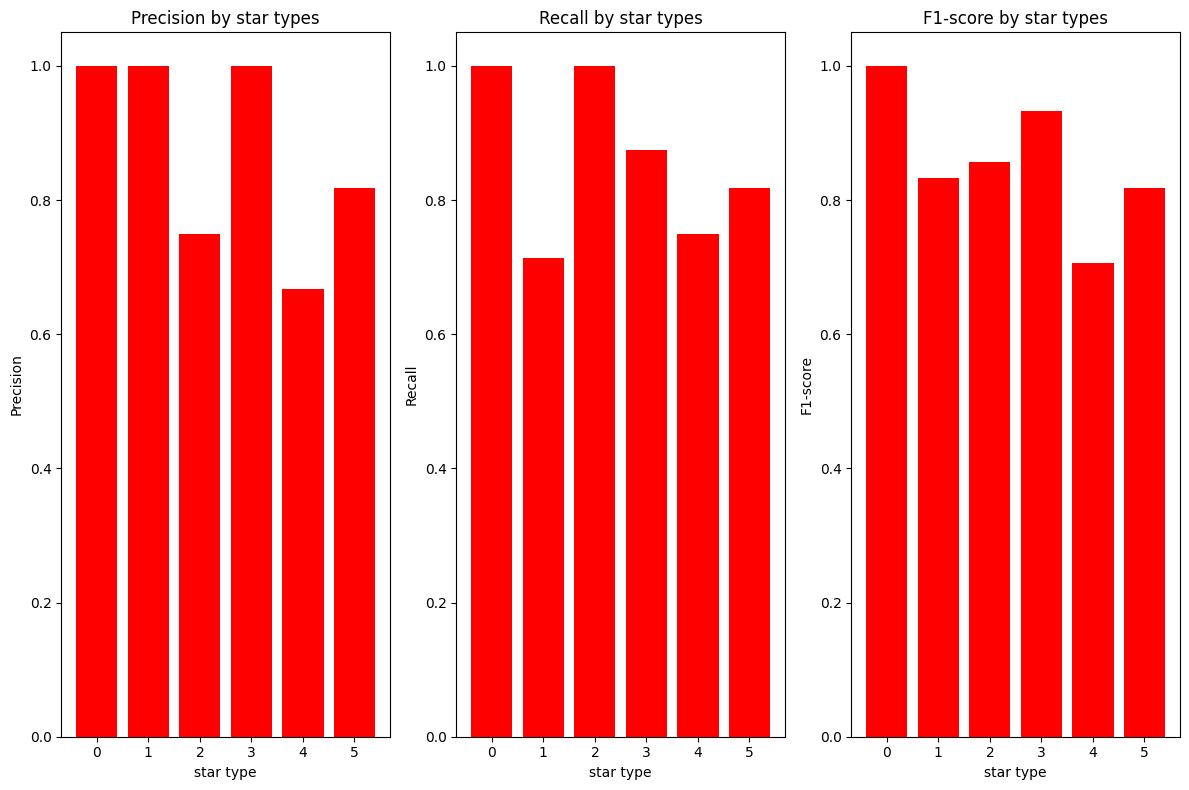

In [106]:
# To set the figure size
plt.figure(figsize=(12, 8))

# Plot score the classification scores
report = classification_report(test_labels, predicted_classes, output_dict=True)

classes = list(report.keys())[:-3]
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {cls: {metric: report[cls][metric] for metric in metrics} for cls in classes}

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    plt.bar(classes, [class_metrics[cls][metric] for cls in classes], color='red')
    plt.title(f'{metric.capitalize()} by star types')
    plt.xlabel('star type')
    plt.ylabel(metric.capitalize())

plt.tight_layout()
plt.show()


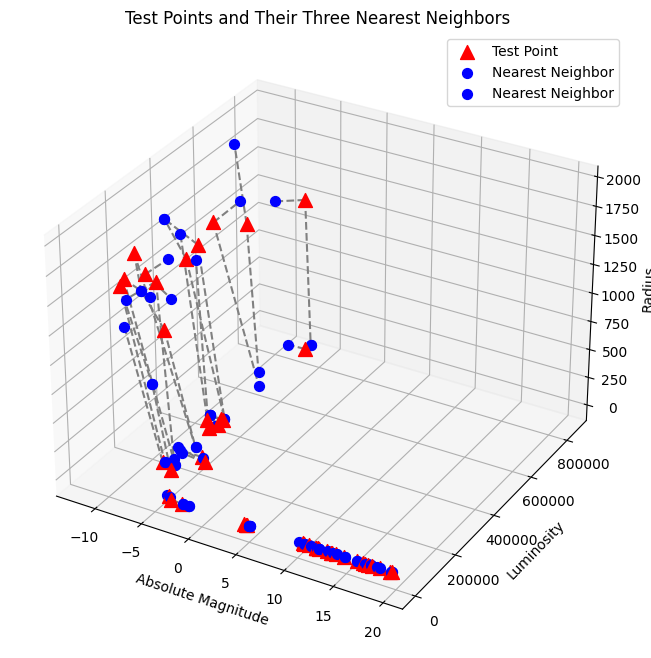

In [107]:
tree = KDTree(train_features, leaf_size=30)

# Find the two nearest neighbors for each test data point
nearest_indices = []
for point in test_features:
    _, ind = tree.query([point], k=2)  # Adjust k to 2 to get three nearest neighbors
    nearest_indices.append(ind[0])

# Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting each test point and its nearest neighbors
for i, point in enumerate(test_features):
    # Test point
    ax.scatter(point[0], point[1], point[2], color='red', marker='^', s=100, label='Test Point' if i == 0 else "")

    # Plot three nearest neighbors
    for idx in nearest_indices[i]:
        neighbor_point = train_features[idx]
        ax.scatter(neighbor_point[0], neighbor_point[1], neighbor_point[2], color='blue', marker='o', s=50, label='Nearest Neighbor' if i == 0 else "")
        # Draw lines connecting the test point to its neighbors
        ax.plot([point[0], neighbor_point[0]], [point[1], neighbor_point[1]], [point[2], neighbor_point[2]], 'gray', linestyle='--')

ax.set_xlabel('Absolute Magnitude')
ax.set_ylabel('Luminosity')
ax.set_zlabel('Radius')
ax.set_title('Test Points and Their Three Nearest Neighbors')
ax.legend()
plt.show()

<h2>Decision Tree</h2>

In [138]:
# Implement DT
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('The accuracy score: ', round(accuracy_score(y_test, y_pred), 2))

The accuracy score:  0.77


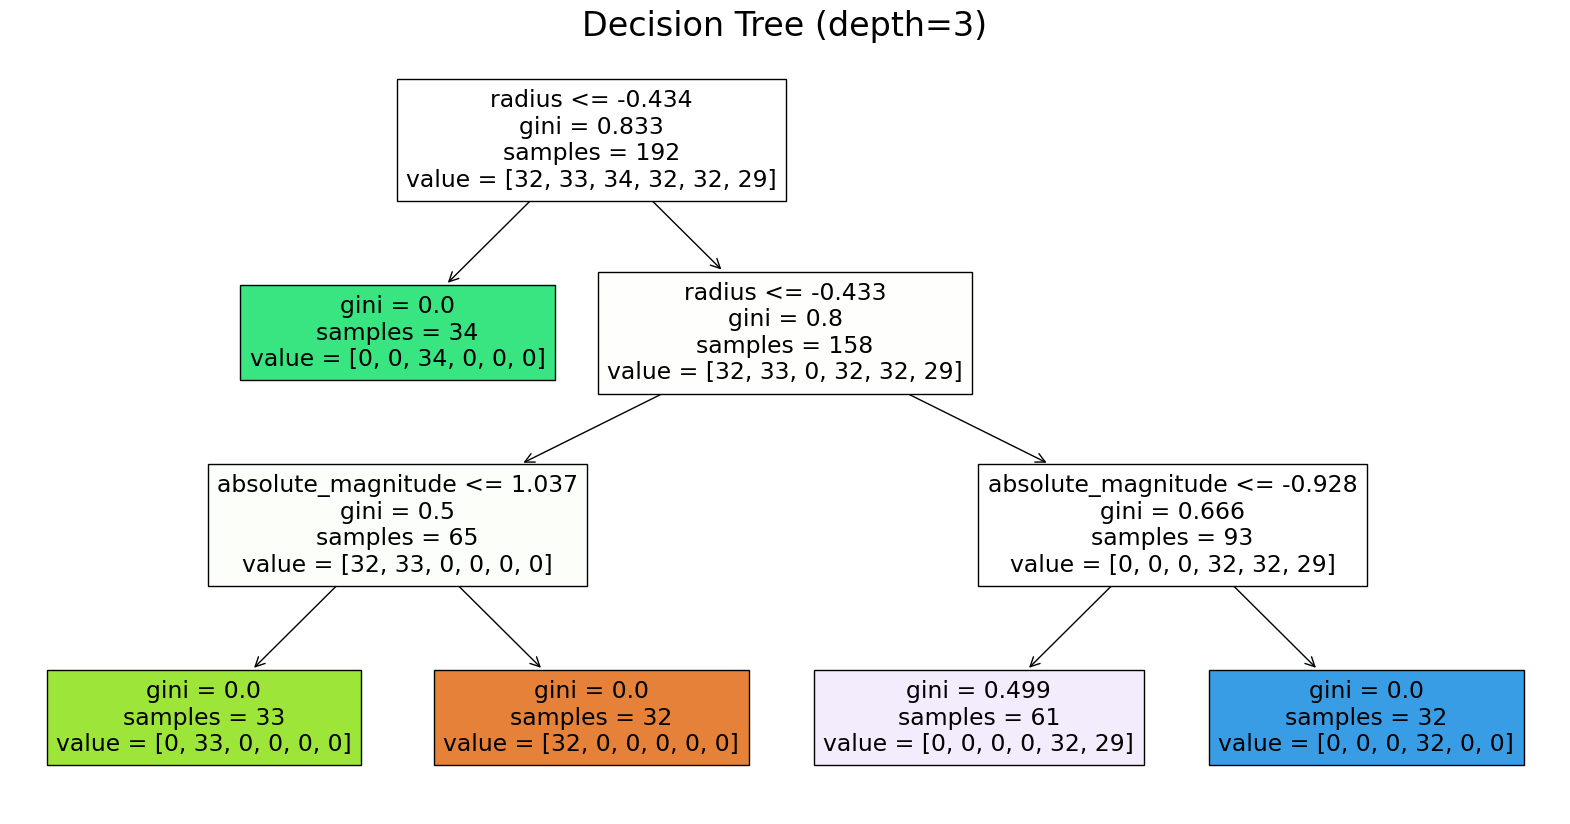

In [139]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=new_df.drop(['star_type'], axis=1).columns)
plt.title('Decision Tree (depth=3)', fontsize=24)
plt.show()


Text(0.5, 58.7222222222222, 'Predicted class')

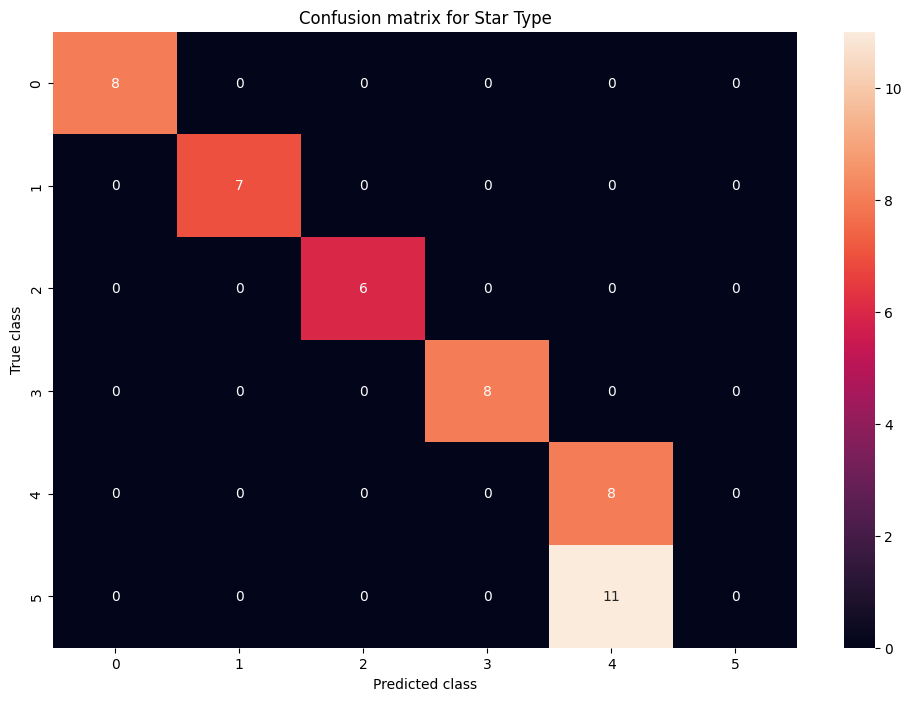

In [140]:
# Set the figure size
plt.figure(figsize=(12, 8))

# To get the confusion matrix and plot it
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title('Confusion matrix for Star Type')
plt.ylabel('True class')
plt.xlabel('Predicted class')

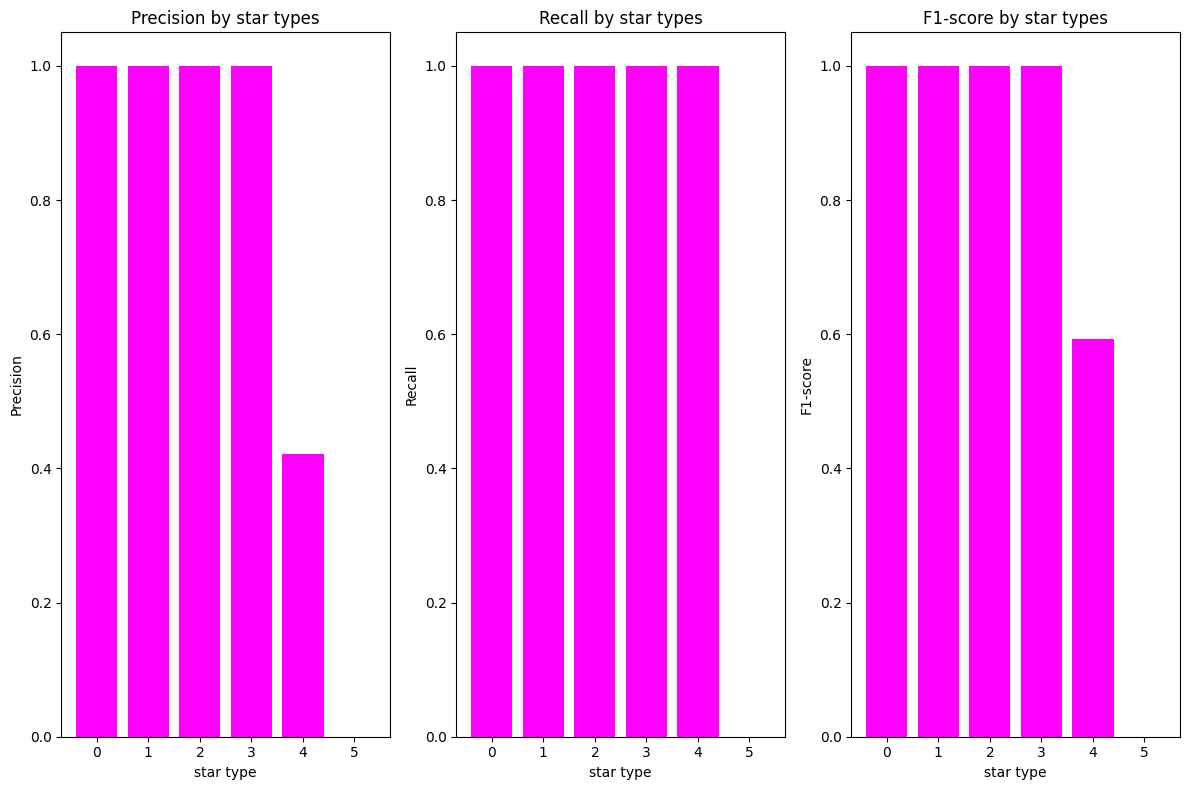

In [110]:
# To set the figure size
plt.figure(figsize=(12, 8))

# Plot score the classification scores
report = classification_report(y_test, y_pred, output_dict=True)

classes = list(report.keys())[:-3]
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {cls: {metric: report[cls][metric] for metric in metrics} for cls in classes}

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    plt.bar(classes, [class_metrics[cls][metric] for cls in classes], color='magenta')
    plt.title(f'{metric.capitalize()} by star types')
    plt.xlabel('star type')
    plt.ylabel(metric.capitalize())

plt.tight_layout()
plt.show()
